In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('../iris.csv')
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# jos jedan pajtonovski nacin da izdvojimo odredjene kolone, uzimamo sve redove i prve 4 kolone
# NOTE: ovde pise 2 zbog necega sto smo radili tek nakon sto smo napravili model, vidi posle zasto,
# ali u normalnim situacijama uzeli bismo svih 4 kolona
X = df.iloc[:, :2]

# NOTE: za y je prvo stajalo ovo sto je u komentaru ispod, a zbog onog posle smo uradili factorize,
# da od kategorickih atributa dobijemo neke brojeve, zato sto nam je trebalo za crtanje
# y = df.iloc[:, -1]  # prakticno isto sto i df['Species']

# factorize nam vrati tuple gde je prvo niz a drugo Index objekat, a posto nam treba samo taj niz
# uzimamo [0]
y = pd.factorize(df['Species'])[0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape)
print(y_test.shape)

(105, 2)
(45,)


In [6]:
# bitna stvar za KNN je skala na kojoj se podaci nalaze, tj bitno nam je da li je neki sused veoma blizu 
# ili veoma daleko. U ovakvim situacija nam je pametno da za svaki slucaj uradimo normalizaciju ili 
# standardizaciju (zavisi kako nam je pogodnije), da se svi ti podaci prebace na neku novu skalu

# za standardizaciju mozemod a koristimo ugradjenu klasu StandardScaler iz sklearn.preprocessing
# .fit() ce da nam, izracuna mean i stddev. 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
print(scaler.mean_)   # srednje vrednosti za svaki od atributa
print(scaler.var_)    # varijanse za svaki od atributa

[5.84380952 3.04190476]
[0.70893787 0.17157732]


In [8]:
# Primetimo da StandardScaler nema predict metod posto to samo po sebi nije model
# koristimo transform(skup) da bi prtomenili skup tako da mu mean = 0 a stddev = 1
X_train = scaler.transform(X_train)

In [9]:
# transformacija mora da se desi i na test skupu. Tu imamo 2 opcije:
# 1) da pravimo novi scaler specijalno za test skup
# 2) da koristimo vec postojeci scaler sa train skupa
# U prvoj opciji je naravno realnije skaliranje na test podacima, ali druga opcija je bolja zato sto
# mi treba da se pravimo da test skup ne postoji do trenutka kad pozove predict. I treba da predvidjamo
# na osnovu modela koji je izgradjen sa train skupom, pa makar on ne odgovarao u potpunosti test podacima

# u scaleru su nam ostali zapamceni podaci za skaliranje
X_test = scaler.transform(X_test)

In [10]:
# zavrisli smo preprocesiranje, sada pravimo model

# po defaultu k=5.  weights nam sluzi da odredimo koliko su susedi bitni. Ako stavmo uniform(ovo je po
# dafaultu, svi susedi su podjednako bitni, a ako stavimo distance, susedi koji su blizi imaju vecu tezinu 
model = KNeighborsClassifier(n_neighbors=10)

In [11]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
y_predicted = model.predict(X_test)
print(confusion_matrix(y_test, y_predicted))
print(accuracy_score(y_test, y_predicted))

[[15  0  0]
 [ 0 11  4]
 [ 0  6  9]]
0.7777777777777778


In [13]:
# sada dolazi na red isprobavanje razlicith parametara pri pravljenju modela u nadi da ce se poboljsati
# opet mozemo da koristimo GridSearchCV da nebi pisali sve kombinacije rucno, ali to ne radimo u ovom
# primeru, isto je sve kao prosle nedelje

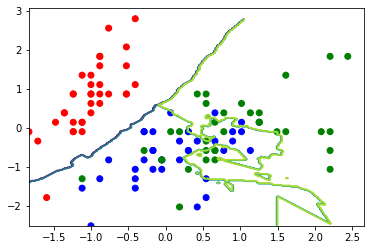

In [14]:
# NOTE: objasnjenje zasto gore u iloc pise 2 umesto 4
# Sada hocemo da vizuelizujemo KNN, ali imamo problem. Mi imamo 4 numericka tributa, sto fizicki ne mozemo 
# da predstavimo na grafiku (maksimalno mozmoemo da imamo 3 dimenzije). Sada smo odlucili da hocemo 2D 
# grafik. Da bismo to postigli odlucili smo da odbacimo 2 cele kolone podataka, i onda da vidimo kakav 
# model dobijamo. Siugurno se dobija losiji model, samo je pitanje koliko losiji.
# Kada smo dobili taj model, posto imamo samo 2 atributa, sada mozemo da vizuelizujemo. Hocemo nekako
# na grafiku da povucemo linije tako da ga izdelimo na regione gde je neka klasa
# da bi nam lepo izgldao grafik koristicemo neke stvari koje nisu bas toliko bitne za IP kurs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_min = X_train[:, 0].min()
x_max = X_train[:, 0].max()
y_min = X_train[:, 1].min()
y_max = X_train[:, 1].max()

# pravimo neku kao mrezu na osnovu intervala koje smo nasli iznad, gde je svaka kockica velicine step*step
step = 0.02
xx, yy = np.meshgrid( np.arange(x_min, x_max, step)
                    , np.arange(y_min, y_max, step) )
# ovo nije preterano bitno, ne mora da se uci napame
z = model.predict( np.c_[xx.ravel(), yy.ravel()] )
z = z.reshape(xx.shape)

plt.contour(xx, yy, z)
plt.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train, cmap=ListedColormap(['red', 'blue', 'green']))